In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [346]:
df = pd.read_csv("Downloads/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [347]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [348]:
df2 = df.drop(['availability', 'society', 'balcony', 'area_type'], axis=1)
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [349]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [350]:
med = df2['bath'].median()
med

2.0

In [351]:
df2['bath'].fillna(med, inplace=True)
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [352]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [353]:
df2.dropna(inplace=True)
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [354]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [355]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [356]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [357]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [358]:
df2[df2['bhk'] > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [359]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [360]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [361]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [362]:
def average_sqft(X):
    tokens = X.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(X)
    except:
        return None

In [363]:
average_sqft('1100sqft')

In [364]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(average_sqft)
df3['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13303, dtype: float64

In [365]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk


In [366]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [367]:
df3.loc[4]

location      Kothanur
size             2 BHK
total_sqft      1200.0
bath               2.0
price             51.0
bhk                  2
Name: 4, dtype: object

In [368]:
df4 = df3.copy()

In [369]:
df4['price_per_sqft'] = np.floor((df4['price']/df4['total_sqft']) * 100000)
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.0
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.0
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.0
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.0


In [370]:
len(df4['location'].unique())

1304

In [371]:
df4['location'] = df4['location'].apply(lambda x: x.strip())
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0


In [372]:
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [373]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [374]:
df4['location'] = df['location'].apply(lambda x: 'Other' if x in location_stats_less_than_10 else x)
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.0
13316,Other,4 BHK,3600.0,5.0,400.00,4,11111.0
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.0
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.0


In [375]:
len(df4['location'].unique())

283

In [376]:
df5 = df4.copy()

In [377]:
df5[(df5['total_sqft']/df5['bhk']) < 250]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Other,6 Bedroom,1020.0,6.0,370.0,6,36274.0
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.0
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.0
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.0
70,Other,3 Bedroom,500.0,3.0,100.0,3,20000.0
...,...,...,...,...,...,...,...
13221,Other,9 Bedroom,1178.0,9.0,75.0,9,6366.0
13277,Other,7 Bedroom,1400.0,7.0,218.0,7,15571.0
13279,Other,6 Bedroom,1200.0,5.0,130.0,6,10833.0
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.0


In [378]:
df6 = df5[~((df5['total_sqft']/df5['bhk']) < 250)]
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.0
13316,Other,4 BHK,3600.0,5.0,400.00,4,11111.0
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.0
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.0


In [379]:
df6['price_per_sqft'].describe()

count     12645.000000
mean       6351.163147
std        4202.727389
min         267.000000
25%        4219.000000
50%        5306.000000
75%        6969.000000
max      176470.000000
Name: price_per_sqft, dtype: float64

In [380]:
def pps_outliers(dafa):
    df_out = pd.DataFrame()
    for key, subdf in dafa.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        std = np.std(subdf['price_per_sqft'])
        red_df = subdf[(subdf['price_per_sqft']>(m-std)) & (subdf['price_per_sqft']<=(m+std))]
        df_out = pd.concat([df_out, red_df], ignore_index=True)
    return df_out

In [381]:
df7 = pps_outliers(df6)
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Devarabeesana Halli,3 BHK,1672.0,3.0,150.00,3,8971.0
1,Devarabeesana Halli,3 BHK,1750.0,3.0,149.00,3,8514.0
2,Devarabeesana Halli,3 BHK,1750.0,3.0,150.00,3,8571.0
3,Devarachikkanahalli,3 BHK,1250.0,2.0,44.00,3,3520.0
4,Devarachikkanahalli,2 BHK,1250.0,2.0,40.00,2,3200.0
...,...,...,...,...,...,...,...
10391,Yeshwanthpur,3 BHK,1676.0,3.0,92.13,3,5497.0
10392,Yeshwanthpur,3 BHK,2503.0,3.0,138.00,3,5513.0
10393,Yeshwanthpur,3 BHK,1855.0,3.0,135.00,3,7277.0
10394,Yeshwanthpur,3 BHK,1876.0,3.0,160.00,3,8528.0


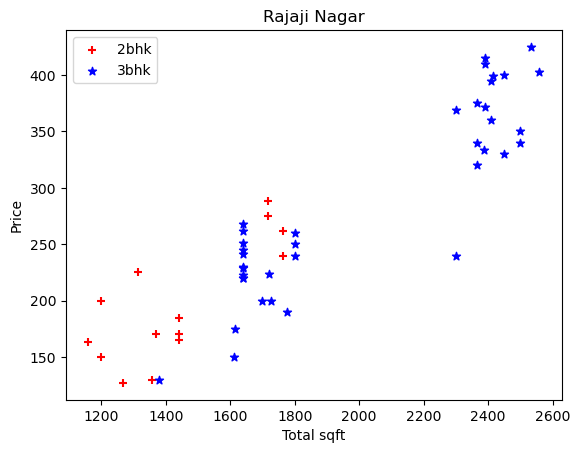

In [382]:
def plot_scatter (df, location):
    df_2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    df_3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    plt.scatter(df_2['total_sqft'], df_2['price'], marker='+', label = '2bhk', color = 'red')
    plt.scatter(df_3['total_sqft'], df_3['price'], marker='*', label = '3bhk', color = 'blue')
    plt.xlabel("Total sqft")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    plt.show()

plot_scatter (df7, "Rajaji Nagar")

In [383]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std': np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7444, 7)

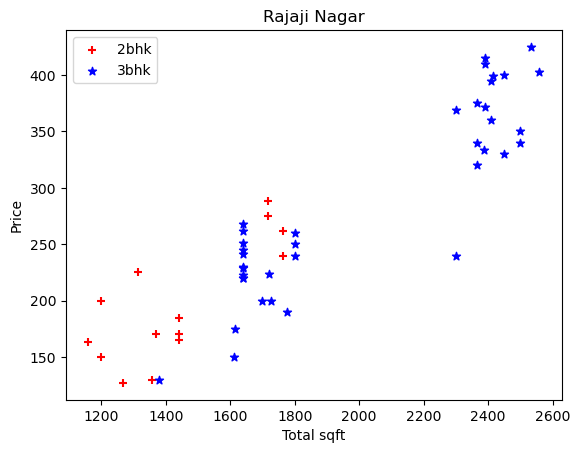

In [384]:
plot_scatter (df7, "Rajaji Nagar")

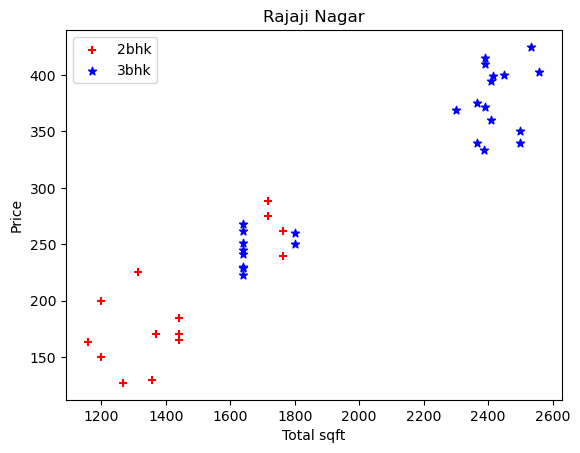

In [385]:
plot_scatter (df8, "Rajaji Nagar")

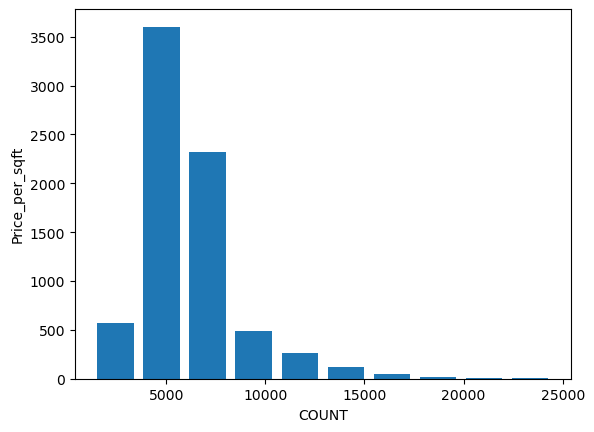

In [386]:
plt.hist(df8['price_per_sqft'], rwidth=0.8)
plt.xlabel('COUNT')
plt.ylabel("Price_per_sqft")
plt.show()

In [387]:
len(df8[df8['bath'] >=10])

6

In [388]:
df8[df8['bath'] >=10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5406,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.0
5819,Other,27 BHK,8000.0,27.0,230.0,27,2875.0
6050,Other,10 BHK,12000.0,12.0,525.0,10,4375.0
6136,Other,16 BHK,10000.0,16.0,550.0,16,5500.0
6862,Other,11 BHK,6000.0,12.0,150.0,11,2500.0
7186,Other,13 BHK,5425.0,13.0,275.0,13,5069.0


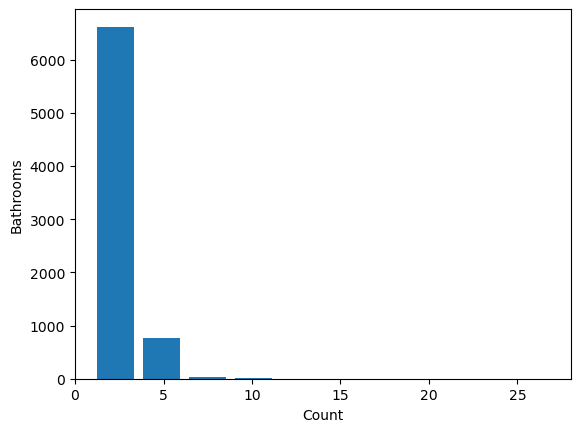

In [389]:
plt.hist(df8['bath'], rwidth=0.8)
plt.xlabel("Count")
plt.ylabel("Bathrooms")
plt.show()

In [390]:
df8[df8['bath'] > (df8['bhk']+2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1560,Chamrajpet,6 Bedroom,1500.0,9.0,230.0,6,15333.0
1695,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.0
5366,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.0
5980,Other,6 BHK,11338.0,9.0,1000.0,6,8819.0
9147,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.0


In [391]:
len(df8[df8['bath'] > (df8['bhk']+2)])

5

In [392]:
df9 = df8[df8['bath'] < (df8['bhk']+2)]
df9.shape

(7363, 7)

In [393]:
df10 = df9.drop(['size', 'price_per_sqft'], axis=1)
df10.head()

,location,total_sqft,bath,price,bhk
0,Devarabeesana Halli,1672.0,3.0,150.0,3
1,Devarabeesana Halli,1750.0,3.0,149.0,3
2,Devarabeesana Halli,1750.0,3.0,150.0,3
4,Devarachikkanahalli,1250.0,2.0,40.0,2
5,Devarachikkanahalli,1200.0,2.0,83.0,2


In [394]:
df10.shape

(7363, 5)

In [395]:
values = {'True':1, 'False':0}
dummies = pd.get_dummies(df10['location']).astype(int)
dummies

,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [396]:
df11 = pd.concat([df10,dummies.drop('Other', axis=1)], axis=1)
df11.head()

,location,total_sqft,bath,price,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarabeesana Halli,1672.0,3.0,150.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarabeesana Halli,1750.0,3.0,149.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarabeesana Halli,1750.0,3.0,150.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1250.0,2.0,40.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,1200.0,2.0,83.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [397]:
df12 = df11.drop('location', axis=1)
df12

,total_sqft,bath,price,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1672.0,3.0,150.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,149.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,150.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,40.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1200.0,2.0,83.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10385,1195.0,2.0,100.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10386,1692.0,3.0,108.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10388,2500.0,5.0,185.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10393,1855.0,3.0,135.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [398]:
X = df12.drop('price', axis=1)
X

,total_sqft,bath,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1672.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1200.0,2.0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10385,1195.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10386,1692.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10388,2500.0,5.0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10393,1855.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [399]:
y = df12['price']
y.head()

0    150.0
1    149.0
2    150.0
4     40.0
5     83.0
Name: price, dtype: float64

In [400]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [401]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)

array([248.88981946, 164.84491794, 102.61032356, ...,  76.48024402,
       137.50866793,  78.71096145])

In [402]:
lr.score(X_test, y_test)

0.8266351632616042

In [403]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits = 5, shuffle=True, random_state=0)

cross_val_score(lr, X, y, cv=cv)

array([ 8.26635163e-01, -9.38584454e+14,  8.57482318e-01, -7.45576981e+12,
        8.84339868e-01])

In [470]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X, y):
    algorithms = {
        'linear_regression':{
            'model': LinearRegression(),
            'params': {
                'copy_X': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['random', 'best']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=2)
    for algo_name, config in algorithms.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({'model': algo_name, 'best_score': gs.best_score_, 'best_parameters': gs.best_params_})
        # print(scores)

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_parameters'])

find_best_model(X, y)

,model,best_score,best_parameters
0,linear_regression,-9.088542e+14,{'copy_X': True}
1,lasso,7.099633e-01,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,7.134232e-01,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [472]:
dtr = DecisionTreeRegressor(criterion = 'squared_error', splitter = 'random')
dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)

0.7162543241531847

In [494]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [500]:
predict_price('Indira Nagar', 1800, 2, 2)

239.6641338951609

In [506]:
predict_price('1st Phase JP Nagar', 1200, 2, 2)

101.36406744375824

In [508]:
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr, f)

In [510]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))